Imbalanced data refers to a situation in datasets where the class distribution is not uniform, meaning one class significantly outnumbers the other class(es). This imbalance can be slight or extreme, with extreme cases where the minority class constitutes a very small fraction of the total dataset. Imbalanced datasets are common in various domains, such as fraud detection, medical diagnosis, and spam filtering, where the event of interest (fraud, disease, spam) is rare compared to the non-event.

# Issues

Imbalanced datasets can lead to several issues, particularly when developing predictive models. These issues include:

## Model Bias

- **Bias towards Majority Class**: Machine learning algorithms aim to maximize overall accuracy by default. In the context of imbalanced data, this often leads to models that are biased towards the majority class, as correctly predicting the majority class will still achieve high accuracy.
- **Poor Generalization for Minority Class**: As a consequence, the model may perform poorly on the minority class because it has not effectively learned the characteristics of the minority class instances.

## Misleading Model Evaluation

- **Accuracy Paradox**: Traditional evaluation metrics like accuracy can be misleading in the context of imbalanced datasets. A model could simply predict the majority class for all instances and still achieve high accuracy, despite failing to correctly classify any minority class instances.
- **Need for Advanced Metrics**: This necessitates the use of more nuanced metrics such as precision, recall, F1-score, and the Area Under the Receiver Operating Characteristic Curve (AUROC) to gain a true understanding of model performance, especially its ability to detect minority class instances.

## Overfitting

- **Overfitting to Majority Class**: There's a risk that the model overfits to the majority class, capturing noise rather than the underlying patterns, especially if the minority class is not just underrepresented but also under-sampled.

To demonstrate the issues caused by imbalanced data, in the lesson we use **Credit Card Fraud Detection Dataset**. In this dataset contains transactions made by credit cards in September 2013 by European cardholders. It presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

In [2]:
import numpy as np
import pandas as pd
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

from imblearn.over_sampling import SMOTE
from imblearn.ensemble import BalancedRandomForestClassifier

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.under_sampling import RandomUnderSampler

import warnings
warnings.filterwarnings('ignore')

In [3]:
credit = pd.read_csv('./Data/creditcard.csv')

credit.sample(3)

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
517,383.0,-0.907909,1.622223,0.036381,0.526254,0.343560,-0.814126,1.286353,-0.513284,0.650091,...,-0.118735,0.640329,0.022339,0.297445,-0.650608,-0.530175,-0.042296,-0.490802,17.99,0
83223,59741.0,-0.625264,1.316498,1.121048,0.869104,0.608456,-1.045630,0.850465,-0.129441,-1.131925,...,-0.012568,0.011874,-0.253619,0.518236,0.232526,0.544213,0.052005,0.106726,0.76,0
256768,157850.0,1.997960,-0.236238,-0.299657,0.382221,-0.622272,-0.699215,-0.446888,-0.087426,1.160279,...,-0.138284,-0.257183,0.372755,-0.125935,-0.443634,-0.607855,0.038171,-0.031887,1.00,0


In [4]:
# Basic information about the dataset
credit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [5]:
# Checking the balance of the classes
class_distribution = credit['Class'].value_counts(normalize=True)
print(class_distribution)

Class
0    0.998273
1    0.001727
Name: proportion, dtype: float64


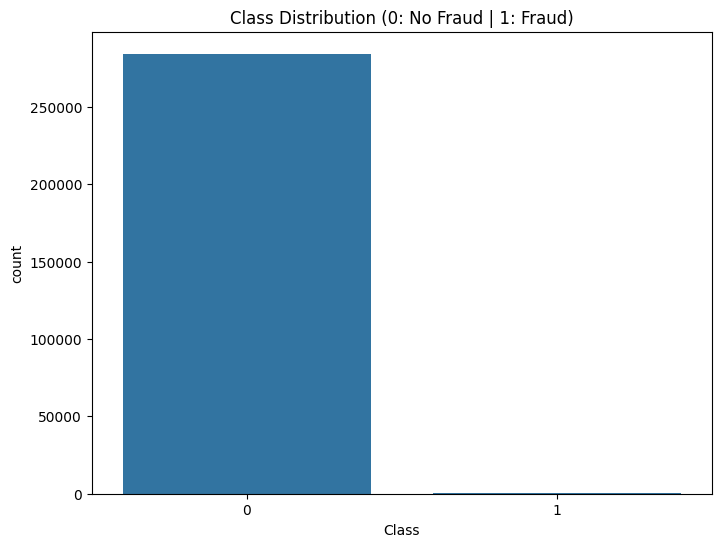

In [6]:
# Visualizing the class imbalance
plt.figure(figsize=(8, 6))
sns.countplot(x='Class', data=credit)
plt.title('Class Distribution (0: No Fraud | 1: Fraud)')
plt.show()

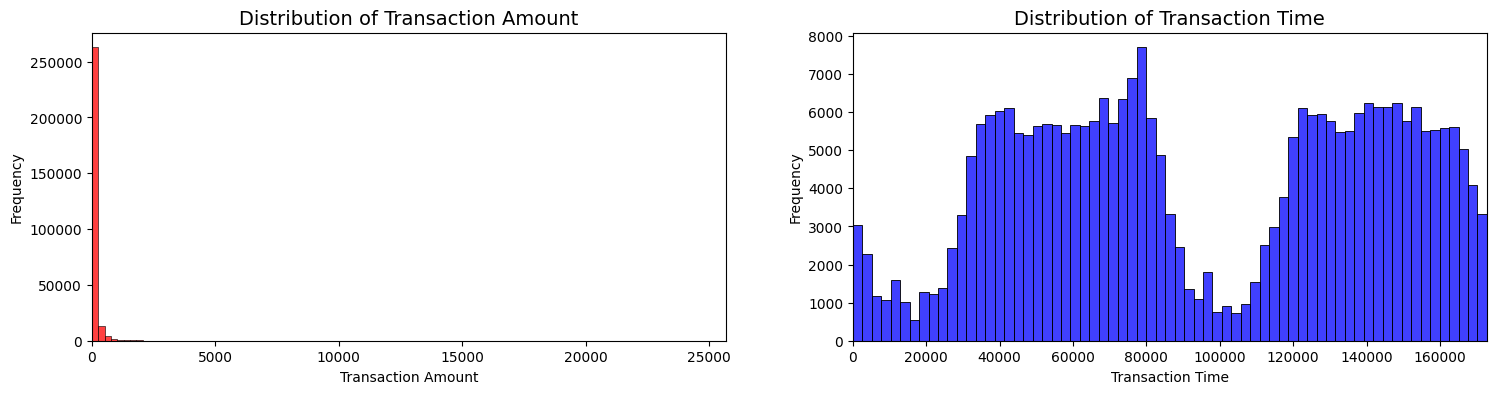

In [7]:
# Visualizing the distribution of transaction amounts and time with fraud occurrence
fig, ax = plt.subplots(1, 2, figsize=(18, 4))

amount_val = credit['Amount'].values
time_val = credit['Time'].values

sns.histplot(amount_val, ax=ax[0], bins=100, color='r')
ax[0].set_title('Distribution of Transaction Amount', fontsize=14)
ax[0].set_xlim([min(amount_val), max(amount_val)])
ax[0].set_xlabel('Transaction Amount')
ax[0].set_ylabel('Frequency')

sns.histplot(time_val, ax=ax[1], color='b')
ax[1].set_title('Distribution of Transaction Time', fontsize=14)
ax[1].set_xlim([min(time_val), max(time_val)])
ax[1].set_xlabel('Transaction Time')
ax[1].set_ylabel('Frequency')

plt.show()

# Handling Techniques

To address the challenges posed by imbalanced datasets, various techniques have been developed, including:

## Resampling Methods

### Oversampling Minority Class: 
Increasing the number of instances in the minority class by replicating them or generating synthetic samples (e.g., SMOTE - Synthetic Minority Over-sampling Technique).

When working with datasets in fields like finance, healthcare, or security, we often encounter a common challenge: imbalanced classes. This means one class (the minority) has far fewer instances than the other(s) (the majority). For example, in fraud detection, fraudulent transactions are much rarer than legitimate ones. This imbalance can make it hard for machine learning models to learn about the minority class, leading to poor performance in detecting these critical but rare events.

**What is Oversampling?**

Oversampling is a technique used to address this imbalance by increasing the number of instances in the minority class. The goal is to balance the dataset, making the minority class more represented. This helps the machine learning model learn better by giving it more examples of the minority class to learn from.

**How Does Oversampling Work?**

There are two main ways to oversample the minority class:

#### Simple Replication

The simplest form of oversampling is replicating existing instances of the minority class. This means copying the minority class data points multiple times to increase their presence in the dataset. While easy to implement, this method can lead to overfitting, where the model learns the replicated examples too well and performs poorly on unseen data.

#### Generating Synthetic Samples

A more sophisticated approach involves generating new, synthetic instances of the minority class. This can be done using algorithms like **SMOTE (Synthetic Minority Over-sampling Technique)**. SMOTE works by selecting instances that are close in the feature space, drawing a line between the instances in the feature space, and drawing a new sample at a point along that line. This approach generates new, plausible examples of the minority class, helping the model learn a broader representation of that class.

In [10]:
# Separate input features and target
X = credit.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = credit['Class']

# Splitting dataset into training and testing set
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Applying SMOTE
sm = SMOTE(random_state=42)
X_res, y_res = sm.fit_resample(X_train, y_train)

# Summary before and after
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 227451, 1: 227451})


**Why Use SMOTE?**

- **Variety**: SMOTE introduces more diversity into the dataset by creating synthetic instances, rather than just copying existing ones. This helps prevent overfitting.
- **Improved Learning**: By creating a balanced dataset, models can learn the characteristics of the minority class more effectively, leading to better detection of these instances in real-world scenarios.
- **Enhanced Model Performance**: Models trained on oversampled datasets often show improved performance on imbalanced datasets, particularly in their ability to correctly identify minority class instances.

### Undersampling Majority Class: 
Reducing the number of instances in the majority class to balance the class distribution. This can lead to a loss of potentially useful data, however.

In many real-world machine learning applications, from fraud detection to medical diagnosis, we often face the challenge of imbalanced datasets. This imbalance usually skews towards one class (the majority) having many more instances than the other (the minority). While oversampling techniques focus on increasing the minority class's representation, another approach to address imbalance is undersampling the majority class.

**What is Undersampling?**

Undersampling involves reducing the number of instances in the majority class to make the class distribution more balanced. The primary goal is to decrease the size of the majority class to match the minority class's size, thereby creating a dataset where both classes are equally represented.

**How Does Undersampling Work?**

There are several strategies for undersampling, but the most straightforward approach is to randomly select a subset of the majority class. This selection reduces the majority class's size to a level comparable to the minority class. The main methods of undersampling include:


#### Informed Undersampling

Informed undersampling techniques, such as NearMiss, use clustering methods to retain the majority class instances that are most valuable for learning, typically those that are close to the minority class instances. This approach aims to preserve the informative aspects of the majority class while still reducing its size.



#### Random Undersampling

This method involves randomly selecting a subset of the majority class without replacement, meaning each selected instance is removed from the pool of potential selections. This randomness helps maintain the majority class's diversity, but there's a risk of losing potentially valuable data that could help the model learn more nuanced patterns.

In [11]:
# Applying Random Under-sampling
rus = RandomUnderSampler(random_state=42)
X_res, y_res = rus.fit_resample(X_train, y_train)

# Summary before and after
print('Original dataset shape %s' % Counter(y_train))
print('Resampled dataset shape %s' % Counter(y_res))

Original dataset shape Counter({0: 227451, 1: 394})
Resampled dataset shape Counter({0: 394, 1: 394})




#### Advantages

- **Computational Efficiency**: By reducing the size of the dataset, undersampling can make training models faster and more computationally efficient.
- **Mitigating Overfitting**: It helps to prevent the model from overfitting to the majority class by balancing the class distribution.

#### Disadvantages

- **Loss of Information**: Randomly discarding instances from the majority class can lead to the loss of important data, potentially degrading the model's performance.
- **Limited Effectiveness**: If the imbalance is extreme, undersampling the majority class too much might not leave enough data for effective model training.

## Algorithmic Approaches

### Cost-sensitive Learning
Modifying algorithms to make the cost of misclassifying minority class instances higher than that of misclassifying majority class instances. Cost-sensitive learning is a crucial concept in machine learning, especially when dealing with imbalanced datasets where the classes are not represented equally. Let's break down this concept into simpler parts for better understanding.

In many real-world scenarios, not all mistakes made by a machine learning model are equal. Some errors can have more severe consequences than others. For example, in medical diagnosis, falsely predicting a healthy person as sick (false positive) is less critical than missing an actual sick person (false negative), as the latter can lead to a lack of necessary treatment.

Cost-sensitive learning is a strategy that addresses this issue by assigning different costs to different types of errors. It modifies the learning algorithm to minimize not just the number of errors but the total cost associated with those errors.

**Why is it Important?**

In a balanced dataset, each class has approximately the same number of instances, and usually, the goal is to maximize overall accuracy. However, in imbalanced datasets, where one class significantly outnumbers the other, simply maximizing accuracy can be misleading. For instance, in a dataset with 95% of class A and 5% of class B, a naive model that always predicts class A will achieve 95% accuracy but completely fail to identify class B.

Cost-sensitive learning becomes particularly important in such cases because it ensures that the model pays more attention to the minority class by assigning a higher cost to misclassifying instances of this class.

**How Does it Work?**

Cost-sensitive learning can be implemented in two primary ways:

#### Modifying the Algorithm

Some algorithms allow for the direct incorporation of cost into the learning process. This can involve adjusting the algorithm's objective function to penalize certain types of errors more than others.

#### Adjusting Class Weights

Another common approach is to assign weights to classes. For algorithms that support this feature, you can specify that errors in the minority class are more costly than errors in the majority class. This is done by assigning a higher weight to the minority class, making the algorithm "pay more attention" to those instances.


In [12]:
# Calculate class weights for cost-sensitive learning
# 'balanced' automatically adjusts weights inversely proportional to class frequencies in the input data
class_weights = 'balanced'

# Initialize the model with class weights for cost-sensitive learning
model = LogisticRegression(class_weight=class_weights, max_iter=1000)

# Train the model
model.fit(X_train, y_train)

# Predict on test set
predictions = model.predict(X_test)

# Evaluate the model
print("Classification Report:")
print(classification_report(y_test, predictions))
print("Confusion Matrix:")
print(confusion_matrix(y_test, predictions))

Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.97      0.99     56864
           1       0.05      0.94      0.10        98

    accuracy                           0.97     56962
   macro avg       0.53      0.96      0.54     56962
weighted avg       1.00      0.97      0.98     56962

Confusion Matrix:
[[55274  1590]
 [    6    92]]


## Ensemble Methods: 
Using ensemble learning methods like boosting and bagging to improve the classification performance for the minority class. Techniques like Balanced Random Forests and AdaBoost are examples where the ensemble method inherently addresses class imbalance. Ensemble methods are powerful techniques in machine learning that combine the strengths of multiple models to improve overall performance, particularly in handling complex problems like class imbalance. Let's break down these concepts into simpler, more digestible parts for better understanding.

**What are Ensemble Methods?**

Imagine you're trying to solve a tough problem, and instead of tackling it alone, you consult a group of experts. Each expert gives their opinion, and you make the final decision based on their collective input. This is the essence of ensemble methods: combining multiple models (the "experts") to make a final prediction (the "decision").

Ensemble methods are especially useful in dealing with imbalanced datasets, where one class (e.g., fraud) is much less common than the other (e.g., non-fraud). These methods help in not just improving overall accuracy but also in enhancing the detection of the minority class.

### Types of Ensemble Methods

There are primarily two types of ensemble methods: **Boosting** and **Bagging**. Both have unique approaches to model building and learning.

#### Bagging (Bootstrap Aggregating)

- **How it Works**: Bagging involves creating multiple models (usually of the same type), each trained on a random subset of the training data. The final prediction is typically an average (for regression) or a majority vote (for classification) of the predictions from all models.
- **Key Example**: **Balanced Random Forests**. A variant of the Random Forest algorithm, Balanced Random Forests specifically address class imbalance by balancing the data in each bootstrap sample used to train individual trees.

#### Boosting

- **How it Works**: Boosting builds models sequentially, where each new model attempts to correct errors made by the previous models. Models are weighted based on their accuracy, and more focus is placed on instances that are harder to predict.
- **Key Example**: **AdaBoost** (Adaptive Boosting). AdaBoost starts by fitting a model on the original dataset and then fits additional copies of the model on the same dataset but where the weights of incorrectly classified instances are adjusted such that subsequent models focus more on difficult cases.

### Why Ensemble Methods?

- **Improved Accuracy**: By combining multiple models, ensemble methods can capture complex patterns in the data that single models might miss.
- **Better Handling of Class Imbalance**: Techniques like Balanced Random Forests directly address imbalance by ensuring that each tree in the ensemble focuses on a balanced subset of the data. Boosting methods like AdaBoost adaptively change the dataset's distribution based on the performance of previous models, giving more weight to misclassified instances, often belonging to the minority class.
- **Versatility**: These methods can be applied to various types of data and prediction problems, making them highly adaptable to different scenarios, including those with imbalanced classes.


In [13]:
X = credit.drop('Class', axis=1)  # Assuming 'Class' is the target column
y = credit['Class']

from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

# Initialize and fit the model
brf = BalancedRandomForestClassifier(n_estimators=100, random_state=42)
brf.fit(X_train, y_train)

# Predictions
y_pred_brf = brf.predict(X_test)

# Evaluation
print("Balanced Random Forest Classifier:")
print(classification_report(y_test, y_pred_brf))
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_brf))

Balanced Random Forest Classifier:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     56864
           1       0.06      0.92      0.11        98

    accuracy                           0.98     56962
   macro avg       0.53      0.95      0.55     56962
weighted avg       1.00      0.98      0.99     56962

Confusion Matrix:
[[55448  1416]
 [    8    90]]


## Evaluation Metrics

- **Using Appropriate Metrics**: Employing performance metrics that provide more insight into the effectiveness of the model in classifying minority class instances, such as precision-recall (PR) curves, F1-score, balanced accuracy, and AUROC.

## Data Collection

- **Additional Data Collection**: Sometimes, collecting more data can help, especially if the data collection process initially overlooked instances from the minority class.

# It's your time to shine!

Try to apply what you learned to the `titanic` dataset, described below:

**Titanic: Machine Learning from Disaster**

- **Description**: The Titanic dataset is a classic and very popular dataset used for various machine learning tasks, including binary classification (survival prediction). It includes passenger information like age, sex, ticket class, and whether or not they survived the disaster.
- **Imbalanced Nature**: The survival rate in this dataset is imbalanced, though not as severely as the fraud detection dataset. It's a good starting point for discussions on imbalance and its effects on model performance.
- **Missing Data Aspect**: This dataset contains missing values in several columns, such as age and cabin number, making it an excellent case for teaching how to handle missing data. Techniques such as imputation, dropping rows/columns, or using algorithms that can handle missing values directly can be explored.